<a href="https://colab.research.google.com/github/jazhu1/CreditDefault/blob/main/CreditDefault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
#https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import logit
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC

In [76]:
# Importing the heart data from the CSV file
df = pd.read_csv('UCI_Credit_Card.csv')

In [77]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [78]:
#checking for missing or null values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [79]:
df.astype(float).describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [80]:
#changing education to str
df = df.astype(int)
df['EDUCATION'] = df['EDUCATION'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [81]:
#looking at response variable
df['default.payment.next.month'].unique()
print("default payment yes: ", (df["default.payment.next.month"] == 1).sum())
print("default payment no: ", (df["default.payment.next.month"] == 0).sum())

default payment yes:  6636
default payment no:  23364


In [82]:
#simple feature engineering, creating a sum column
payment_amount = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df['total_paid']= df[payment_amount].sum(axis=1)
payment_due = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df['total_due']= df[payment_due].sum(axis=1)

df['payment_diff'] = df['total_due'] - df['total_paid']

In [83]:
#creating binary column where if there exists a payment_diff, there will be a 0
df['payment_diffBinary'] = np.where(df['payment_diff'] == '0', 1, 0)

In [84]:
scaler = MinMaxScaler(feature_range=(0, 1))

#scaling
scaler.fit(df)

#transform
scaled_data = scaler.transform(df)

#new df
df = pd.DataFrame(scaled_data, columns=df.columns)

In [85]:
#feature selection

from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier


X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

estimator = GradientBoostingClassifier()
n_features_to_select = 10
rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)


rfe.fit(X, y)


selected_features = X.columns[rfe.support_]


df_rfe = df[selected_features].copy()
df_rfe['default.payment.next.month'] = df['default.payment.next.month']

In [86]:
df_rfe

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,BILL_AMT1,PAY_AMT1,total_paid,total_due,default.payment.next.month
0,0.010101,0.4,0.4,0.1,0.1,0.0,0.149982,0.000000,0.000183,0.061420,1.0
1,0.111111,0.1,0.4,0.2,0.2,0.4,0.148892,0.000000,0.001328,0.063094,1.0
2,0.080808,0.2,0.2,0.2,0.2,0.2,0.172392,0.001738,0.002927,0.078197,0.0
3,0.040404,0.2,0.2,0.2,0.2,0.2,0.188100,0.002290,0.002228,0.101353,0.0
4,0.040404,0.1,0.2,0.1,0.2,0.2,0.154144,0.002290,0.015688,0.079569,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.2,0.2,0.2,0.2,0.2,0.313716,0.009730,0.011304,0.189568,0.0
29996,0.141414,0.1,0.1,0.1,0.1,0.2,0.148008,0.002103,0.003850,0.063827,0.0
29997,0.020202,0.6,0.5,0.4,0.1,0.2,0.149674,0.000000,0.008315,0.072633,1.0
29998,0.070707,0.3,0.1,0.2,0.2,0.1,0.145064,0.098334,0.039102,0.107653,1.0


In [87]:
# creating train/test split
y = df['default.payment.next.month']  # response variable
x = df.drop('default.payment.next.month', axis=1)

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    train_size = 0.9,
    shuffle = True,
    random_state = 20,
)

# number of observations in training data and test data
print("# of observations in training data: ", len(y_train))
print("# of observations in test data: ", len(y_test))

# of observations in training data:  27000
# of observations in test data:  3000


In [88]:
# number of observations in each outcome group (training data)
print("default payment no: ", (y_train == 0).sum())
print("default payment yes: ", (y_train == 1).sum())

# number of observations in each outcome group (test data)
print("default payment no: ", (y_test == 0).sum())
print("default payment yes: ", (y_test == 1).sum())

default payment no:  21030
default payment yes:  5970
default payment no:  2334
default payment yes:  666


In [33]:
#Custom weight sampling  on xgb

X = df_rfe.drop('default.payment.next.month', axis=1)
y = df_rfe['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#ratio of negative to positive
ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

#weight balancing
xgb_model = xgb.XGBClassifier(scale_pos_weight=ratio)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.75
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83      4687
         1.0       0.44      0.59      0.51      1313

    accuracy                           0.75      6000
   macro avg       0.66      0.69      0.67      6000
weighted avg       0.78      0.75      0.76      6000



In [31]:
#logit and oversampler

X = df_rfe.drop('default.payment.next.month', axis=1)
y = df_rfe['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.69
              precision    recall  f1-score   support

         0.0       0.88      0.71      0.78      4687
         1.0       0.38      0.64      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.77      0.69      0.72      6000



In [89]:
#sv classifier with oversampling
X = df_rfe.drop('default.payment.next.month', axis=1)
y = df_rfe['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train_resampled, y_train_resampled)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.77
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      4687
         1.0       0.48      0.59      0.53      1313

    accuracy                           0.77      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.77      0.78      6000



In [90]:
# predictions
X_test['probability'] = svm_model.predict(X_test)
# column of predictions
X_test['prediction'] = np.where(X_test['probability'] > 0.50, 1, 0)

X_test.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,BILL_AMT1,PAY_AMT1,total_paid,total_due,probability,prediction
2308,0.020202,0.2,0.2,0.2,0.2,0.2,0.154363,0.001717,0.002657,0.072836,0.0,0
22404,0.141414,0.2,0.2,0.2,0.2,0.2,0.267515,0.005135,0.005278,0.173552,0.0,0
23397,0.060606,0.2,0.2,0.2,0.2,0.2,0.208569,0.002783,0.004260,0.134651,0.0,0
25058,0.121212,0.2,0.2,0.2,0.2,0.1,0.164817,0.001843,0.005812,0.076274,0.0,0
2664,0.040404,0.2,0.2,0.2,0.2,0.4,0.229900,0.002290,0.001939,0.103531,0.0,0


In [91]:
y_test_column = df_rfe['default.payment.next.month']
X_test = pd.concat([X_test, y_test_column], axis=1)
X_test['true_prediction'] = np.where(X_test['prediction'] == X_test['default.payment.next.month'], 0, 1)

In [93]:
# number of accurate and inaccurate predictions
print("# of false predictions: ", (X_test['true_prediction'] == 0).sum())
print("# of true predictions: ", (X_test['true_prediction'] == 1).sum())


# of false predictions:  4624
# of true predictions:  25376


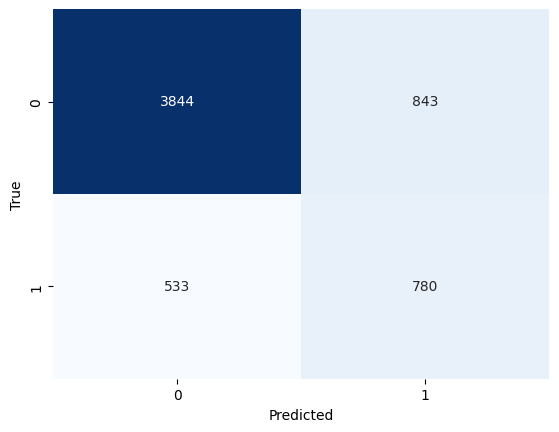

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

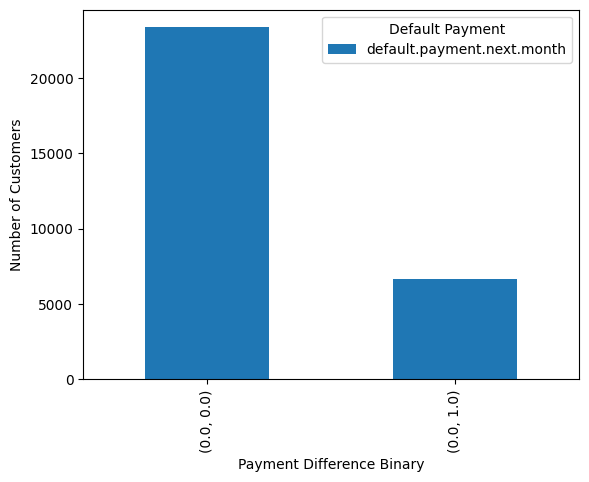

In [97]:
# Group the data by the explanatory variable and count the number of responses
bar_chart = df.groupby('payment_diffBinary')['default.payment.next.month'].value_counts()

# Plot the bar chart
ax = bar_chart.plot(kind='bar', stacked=False)
ax.set_xlabel('Payment Difference Binary')
ax.set_ylabel('Number of Customers')
ax.legend(title='Default Payment', loc='upper right')
plt.show()

In [ ]:
df_rfe.to_csv('output.csv', index=False)